In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
import statistics
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

my_drive = '/content/gdrive/My Drive/'
import sys
sys.path.append(my_drive)

In [ ]:
data_dir = '/content/gdrive/My Drive/Brats 2018/MICCAI_BraTS_2018_Data_Training/'
hgg1=pd.read_csv(data_dir + "HGG_data.csv")
hgg1= hgg1.drop('Unnamed: 0', axis= 1)#Path to csv

lgg1=pd.read_csv(data_dir + "LGG_data.csv")
lgg1= lgg1.drop('Unnamed: 0', axis= 1)

In [ ]:
len(lgg1.iloc[3])

322

In [ ]:
lgg1["GRADE"]=0
hgg1["GRADE"]=1
hgg= hgg1.sample(frac=1, random_state=42).reset_index(drop=True)
lgg= lgg1.sample(frac=1, random_state=42).reset_index(drop=True)

from sklearn.decomposition import PCA

auc_lr=[]
pre_lr=[]
rec_lr=[]
acc_lr=[]
f1_lr=[]
auc_lrt=[]
pre_lrt=[]
rec_lrt=[]
acc_lrt=[]
f1_lrt=[]

In [ ]:
len(lgg.iloc[3])

In [ ]:
master=pd.concat([lgg, hgg])
master= master.sample(frac=1, random_state=42).reset_index(drop=True)
Y=master["GRADE"]
master= master.drop("GRADE", axis=1)
master = (master - master.min()) / (master.max() - master.min())

In [ ]:
len(master.iloc[3])

321

In [ ]:
# master.sample(frac=1, random_state=42).reset_index(drop=True)
lgg

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

y_test = []
y_pred= []

clf = make_pipeline( PCA(.85), RandomForestClassifier(random_state=0, n_estimators=1000, criterion='gini', max_features="auto", min_samples_split=2, min_samples_leaf=1))
for train_index, test_index in cv.split(master, Y):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)

    X_train, X_test = master.iloc[train_index], master.iloc[test_index]
    Y_train, Y_test= Y.iloc[train_index], Y.iloc[test_index]

    X_train= X_train.values
    X_test= X_test.values
    Y_train= Y_train.values
    Y_test= Y_test.values

    print(X_test)

    print(Y_test)

    clf = make_pipeline( PCA(.85), RandomForestClassifier(random_state=0, n_estimators=1000, criterion='gini', max_features="auto", min_samples_split=2, min_samples_leaf=1))

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    pre_l = precision_score(Y_test, pred)
    rec_l = recall_score(Y_test, pred)
    acc_l = accuracy_score(Y_test, pred)
    probs = clf.predict_proba(X_test)
    probs = probs[:, 1]
    auc_l = roc_auc_score(Y_test, probs)
    f1_l=f1_score(Y_test, pred)

    pred = clf.predict(X_train)
    pre_lt = precision_score(Y_train, pred)
    rec_lt = recall_score(Y_train, pred)
    acc_lt = accuracy_score(Y_train, pred)
    probs = clf.predict_proba(X_train)
    probs = probs[:, 1]
    auc_lt = roc_auc_score(Y_train, probs)
    f1_lt = f1_score(Y_train, pred)

    y_test.append(Y_train)
    y_pred.append(pred)

    auc_lr.append(auc_l)
    pre_lr.append(pre_l)
    rec_lr.append(rec_l)
    acc_lr.append(acc_l)
    f1_lr.append(f1_l)

    auc_lrt.append(auc_lt)
    pre_lrt.append(pre_lt)
    rec_lrt.append(rec_lt)
    acc_lrt.append(acc_lt)
    f1_lrt.append(f1_lt)


data = { "phase":["Testing", "Training"],
          "Precision" : [statistics.mean(pre_lr), statistics.mean(pre_lrt)],
          "Recall" : [statistics.mean(rec_lr), statistics.mean(rec_lrt)],
          "Accuracy" : [statistics.mean(acc_lr), statistics.mean(acc_lrt)],
          "AUC" : [statistics.mean(auc_lr), statistics.mean(auc_lrt)],
          "F1 Score" : [statistics.mean(f1_lr), statistics.mean(f1_lrt)]
        }


print("TRAIN:")
print("PRE:", statistics.mean(pre_lrt))
print("REC:", statistics.mean(rec_lrt))
# print("SPE:", statistics.mean(spe_lrt))
# print("MCC:", statistics.mean(mcc_lrt))
# print("SEN:", statistics.mean(sen_lrt))
print("ACC:", statistics.mean(acc_lrt))
print("AUC:", statistics.mean(auc_lrt))
print("F1:", statistics.mean(f1_lrt))

print("TEST:")
print("PRE:", statistics.mean(pre_lr))
print("REC:", statistics.mean(rec_lr))
# print("SPE:", statistics.mean(spe_lr))
# print("MCC:", statistics.mean(mcc_lr))
# print("SEN:", statistics.mean(sen_lr))
print("ACC:", statistics.mean(acc_lr))
print("AUC:", statistics.mean(auc_lr))
print("F1:", statistics.mean(f1_lr))




[[0.43011592 0.48260294 0.39973834 ... 0.28217745 0.095428   0.00760439]
 [0.36065668 0.4943839  0.28508608 ... 0.60960878 0.1356699  0.06032308]
 [0.38846019 0.31566728 0.19632501 ... 0.36245863 0.30158329 0.09124867]
 ...
 [0.63647404 0.43396237 0.36661968 ... 0.04869622 0.0705269  0.01053641]
 [0.60276238 0.66403446 0.35915093 ... 0.09025699 0.24702836 0.0076482 ]
 [0.56140638 0.55651276 0.52023319 ... 0.41914328 0.03938895 0.00830092]]
[0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0]
[[0.49242178 0.56738808 0.17635395 ... 0.26004431 0.11604203 0.06034493]
 [0.60521725 0.63547773 0.20998006 ... 0.28488119 0.50761254 0.14568747]
 [0.36091899 0.53542183 0.48176468 ... 0.10963546 0.13144499 0.00542569]
 ...
 [0.43377543 0.40417774 0.10262727 ... 0.2441682  0.1545563  0.03044177]
 [0.44857228 0.52877735 0.40033239 ... 0.11378449 0.12639786 0.02161833]
 [0.40077167 0.56551923 0.32725087 ... 0.13463324 0.14989279 0.008599

In [ ]:
len(y_test[4])

227

In [ ]:
cf_matrix = confusion_matrix(y_test[4], y_pred[4])

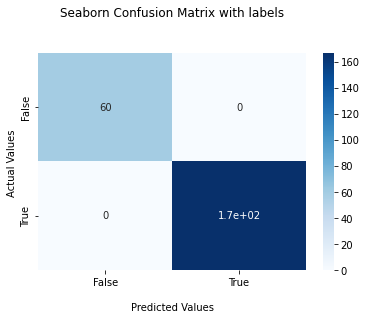

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
metrics = pd.DataFrame.from_dict(data)
metrics.to_csv("/content/gdrive/My Drive/Brats 2018/MICCAI_BraTS_2018_Data_Training/RF_PCA_metrics.csv")

In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(clf, data_dir + 'RFC_PCA_model_01.pkl')

['/content/gdrive/My Drive/Brats 2018/MICCAI_BraTS_2018_Data_Training/RFC_PCA_model_01.pkl']

In [ ]:
norm_hgg = (hgg - hgg.min()) / (hgg.max() - hgg.min())
for i in range(len(norm_hgg)):
  X_master=norm_hgg.iloc[i].to_numpy()
  X_master = np.reshape(X_master,(1, X_master.size))
  print(clf.predict(X_master))


In [ ]:
norm_lgg = (lgg - lgg.min()) / (lgg.max() - lgg.min())

for i in range(len(norm_lgg)):
  X_master=norm_lgg.iloc[i].to_numpy()
  X_master = np.reshape(X_master,(1, X_master.size))
  print(clf.predict(X_master))

In [ ]:
dir= '/content/gdrive/My Drive/Brats 2019/CLF_testing_data.csv'

In [ ]:
tester = pd.read_csv(dir)
t1 = tester.drop("Unnamed: 0", axis=1)
t1 = t1.drop("GRADE", axis=1)
t1 = t1.drop("CASE", axis=1)
t1.head()
t1 = (t1 - t1.min()) / (t1.max() - t1.min())

In [ ]:
X_master=t1.iloc[42].to_numpy()
X_master = np.reshape(X_master,(1, X_master.size))
print(clf.predict(X_master))

[0]
